### Backtest Modelo de Investimento Magic Formula

O QUE É O ROIC: https://statusinvest.com.br/termos/r/roic

O QUE É EV/EBIT: https://statusinvest.com.br/termos/e/ev-ebit

In [1]:
import pandas as pd
import quantstats as qs

In [2]:
df_empresas = pd.read_csv('dados_empresas.csv')
df_ibov = pd.read_csv('ibov.csv')
df_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171
...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287


In [6]:
df_empresas.groupby('ticker').count()

,data,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic
ticker,,,,,
AALR3,91,91,91,91,91
ABEV3,128,128,128,128,128
AEDU3,20,20,20,20,20
AELP3,70,70,70,70,70
AERI3,44,44,44,44,44
...,...,...,...,...,...
WIZC3,17,17,17,17,17
WLMM3,84,84,84,84,84
WLMM4,85,85,85,85,85


### Calcular os retornos mensais das Empresas

In [3]:
df_empresas['retorno'] = df_empresas.groupby('ticker')['preco_fechamento_ajustado'].pct_change()#calcula a mudança percentual entre elementos consecutivos (valor_atual - valor_anterior) / valor_anterior
df_empresas['retorno'] = df_empresas.groupby('ticker')['retorno'].shift(-1)
df_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904,-0.048443
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904,-0.086545
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904,0.226911
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171,0.188838
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171,-0.045306
...,...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474,-0.187050
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287,0.138643
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287,-0.183938
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287,0.187302


### Filtra a Liquidez

In [5]:
df_empresas = df_empresas[df_empresas['volume_negociado'] > 1000000.0]
df_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904,-0.048443
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904,-0.086545
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904,0.226911
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171,0.188838
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171,-0.045306
...,...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474,-0.187050
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287,0.138643
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287,-0.183938
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287,0.187302


### Cria o ranking dos indicadores

In [6]:
# Crie uma cópia completa do DataFrame
df_empresas = df_empresas.copy()
df_empresas['ranking_ev_ebit'] = df_empresas.groupby('data')['ebit_ev'].rank(ascending=False)
df_empresas['ranking_roic'] = df_empresas.groupby('data')['roic'].rank(ascending=False)
df_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904,-0.048443,37.0,60.0
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904,-0.086545,70.0,62.0
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904,0.226911,71.0,66.0
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171,0.188838,79.0,77.0
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171,-0.045306,84.0,75.0
...,...,...,...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474,-0.187050,162.0,172.0
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287,0.138643,160.0,177.0
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287,-0.183938,154.0,169.0
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287,0.187302,158.0,180.0


In [8]:
df_empresas['ranking_final'] = df_empresas['ranking_ev_ebit'] + df_empresas['ranking_roic']
df_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904,-0.048443,37.0,60.0,97.0
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904,-0.086545,70.0,62.0,132.0
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904,0.226911,71.0,66.0,137.0
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171,0.188838,79.0,77.0,156.0
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171,-0.045306,84.0,75.0,159.0
...,...,...,...,...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474,-0.187050,162.0,172.0,334.0
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287,0.138643,160.0,177.0,337.0
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287,-0.183938,154.0,169.0,323.0
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287,0.187302,158.0,180.0,338.0


In [9]:
df_empresas['ranking_final'] = df_empresas.groupby('data')['ranking_final'].rank()
df_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
0,2016-12-31,AALR3,14.45,5375545.0,0.087853,0.058904,-0.048443,37.0,60.0,48.0
1,2017-01-31,AALR3,13.75,3116406.0,0.051572,0.058904,-0.086545,70.0,62.0,74.0
2,2017-02-28,AALR3,12.56,3077805.0,0.055183,0.058904,0.226911,71.0,66.0,76.0
3,2017-03-31,AALR3,15.41,3141709.0,0.047811,0.055171,0.188838,79.0,77.0,81.0
4,2017-04-30,AALR3,18.32,6444929.0,0.041178,0.055171,-0.045306,84.0,75.0,84.5
...,...,...,...,...,...,...,...,...,...,...
50251,2024-02-29,ZAMP3,4.17,1904103.0,0.049875,0.027474,-0.187050,162.0,172.0,173.0
50252,2024-03-31,ZAMP3,3.39,3412842.0,0.061509,0.032287,0.138643,160.0,177.0,174.5
50253,2024-04-30,ZAMP3,3.86,3093860.0,0.056943,0.032287,-0.183938,154.0,169.0,166.0
50254,2024-05-31,ZAMP3,3.15,1874658.0,0.064136,0.032287,0.187302,158.0,180.0,176.0


### Filtro por Data

In [10]:
df_empresas[df_empresas['data'] == '2016-12-31'].sort_values('ranking_final')

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
46650,2016-12-31,TRPL4,8.97,19812514.0,0.651161,0.426695,0.013378,1.0,2.0,1.0
5108,2016-12-31,BRKM5,26.41,49019244.0,0.217395,0.277918,-0.049981,3.0,5.0,2.0
9256,2016-12-31,CGAS5,19.85,5291437.0,0.236162,0.198913,0.014610,2.0,9.0,3.0
13632,2016-12-31,CVCB3,23.07,19340033.0,0.129252,0.333410,0.097096,16.0,3.0,4.0
45397,2016-12-31,TIET11,10.68,8224848.0,0.132071,0.212076,0.038390,14.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...
48432,2016-12-31,VALE3,15.57,123590835.0,-0.105289,-0.135275,0.253693,101.5,104.5,102.5
48571,2016-12-31,VALE5,22.67,341291201.0,-0.105289,-0.135275,0.308778,101.5,104.5,102.5
4580,2016-12-31,BRAP4,6.85,32560196.0,-0.209472,-0.134616,0.400000,104.0,103.0,104.5
48155,2016-12-31,USIM5,3.23,39079288.0,-0.213529,-0.090635,0.281734,105.0,102.0,104.5


#### Cria as Carteiras

In [11]:
df_empresas = df_empresas[df_empresas['ranking_final'] <= 10] # Ranking menores que 10
df_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
563,2016-07-31,AGRO3,7.08,1367216.0,0.222828,0.154424,-0.052260,2.0,18.0,5.5
588,2018-08-31,AGRO3,8.65,1686357.0,0.163671,0.130726,-0.053179,8.0,32.0,10.0
593,2019-01-31,AGRO3,10.16,1254681.0,0.251466,0.210253,-0.013780,3.0,9.0,4.0
595,2019-03-31,AGRO3,9.83,8890526.0,0.252551,0.207867,-0.003052,2.0,7.0,2.0
598,2019-06-30,AGRO3,10.49,5485742.0,0.173807,0.152416,0.005720,9.0,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...
50001,2024-02-29,WIZC3,6.02,2185709.0,0.355313,0.227289,0.166113,4.0,7.0,1.0
50002,2024-03-31,WIZC3,7.02,21525465.0,0.363341,0.217309,-0.011396,4.0,15.0,3.0
50003,2024-04-30,WIZC3,6.94,3375745.0,0.378248,0.217309,-0.142651,4.0,14.0,2.0
50004,2024-05-31,WIZC3,5.95,2538401.0,0.520612,0.225720,-0.040336,2.0,12.0,2.0


### Calcula a rentabilidade por Carteira

In [12]:

rentabilidade_por_carteira = df_empresas.groupby('data')['retorno'].mean()
rentabilidade_por_carteira = rentabilidade_por_carteira.to_frame()
rentabilidade_por_carteira

,retorno
data,
2012-12-31,-0.052051
2013-01-31,0.019020
2013-02-28,0.011480
2013-03-31,0.047786
2013-04-30,0.018336
...,...
2024-02-29,-0.017760
2024-03-31,-0.038745
2024-04-30,-0.027068


### Calcula a rentabilidade do Modelo

In [13]:
rentabilidade_por_carteira['Magic Formula'] = (rentabilidade_por_carteira['retorno'] + 1).cumprod() - 1
rentabilidade_por_carteira = rentabilidade_por_carteira.shift(1)
rentabilidade_por_carteira = rentabilidade_por_carteira.dropna()
rentabilidade_por_carteira

,retorno,Magic Formula
data,,
2013-01-31,-0.052051,-0.052051
2013-02-28,0.019020,-0.034021
2013-03-31,0.011480,-0.022932
2013-04-30,0.047786,0.023759
2013-05-31,0.018336,0.042530
...,...,...
2024-02-29,0.034114,6.067326
2024-03-31,-0.017760,5.941808
2024-04-30,-0.038745,5.672848


In [15]:
retornos_ibov = df_ibov['fechamento'].pct_change().dropna()
retornos_acum_ibov = (1 + retornos_ibov).cumprod() -1
retornos_acum_ibov

1     -0.019533
2     -0.057878
3     -0.075469
4     -0.082716
5     -0.122162
         ...   
134    1.116745
135    1.101751
136    1.065954
137    1.003182
138    1.032852
Name: fechamento, Length: 138, dtype: float64

In [16]:
rentabilidade_por_carteira['ibov'] = retornos_acum_ibov.values
rentabilidade_por_carteira = rentabilidade_por_carteira.drop('retorno', axis=1)

In [17]:
rentabilidade_por_carteira

,Magic Formula,ibov
data,,
2013-01-31,-0.052051,-0.019533
2013-02-28,-0.034021,-0.057878
2013-03-31,-0.022932,-0.075469
2013-04-30,0.023759,-0.082716
2013-05-31,0.042530,-0.122162
...,...,...
2024-02-29,6.067326,1.116745
2024-03-31,5.941808,1.101751
2024-04-30,5.672848,1.065954


### Analisa os Resultados

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


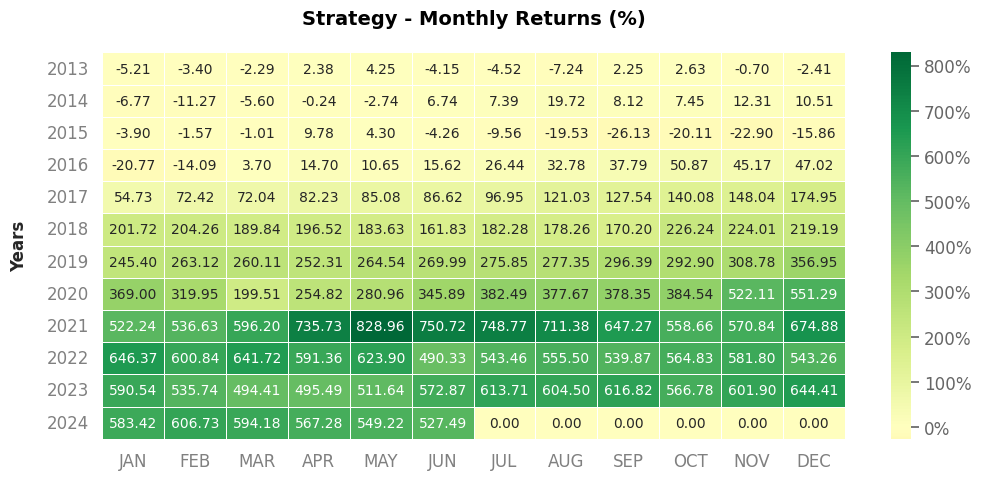

In [20]:


qs.extend_pandas()

rentabilidade_por_carteira.index = pd.to_datetime(rentabilidade_por_carteira.index)
rentabilidade_por_carteira['Magic Formula'].plot_monthly_heatmap()

### Comparando com o Ibovespa

<Axes: xlabel='data'>

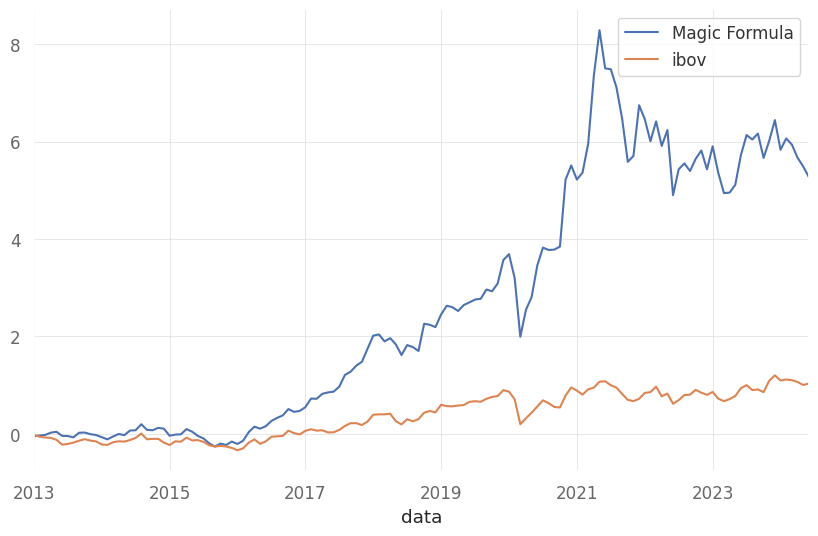

In [21]:
rentabilidade_por_carteira.plot()